In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import seaborn 

In [13]:
SFHH = pd.read_csv('E:/Desktop/wxy/data/tij_SFHH/l_g_tij_SFHH.csv',names = ['time','i','j'],header = None)
ij = pd.read_csv('E:/Desktop/wxy/data/tij_SFHH/label.csv',names = ['lable'],header = None)


In [23]:
rl = pd.read_csv('E:/Desktop/S1.csv')

In [14]:
def mynetwork(mydata,mynodes,t,b):    ##数据集 ，节点集，时间间隔，滑动多少
    dt = t * 20
    AA = np.empty((ij_n,ij_n))
    G = nx.Graph()
    G.add_nodes_from(mynodes['lable'])
    for i in range(len(mydata)):
        if mydata['time'][i] >= mydata['time'][0]+b:
            if mydata['time'][i] <= mydata['time'][0]+b+(t * 20):
                G.add_edge(mydata['i'][i],mydata['j'][i])
            else:
                break
#        AA = nx.to_numpy_matrix(G) #邻接矩阵
    AA = np.array(nx.adjacency_matrix(G).todense())
    return AA

In [18]:
data_n = 50
ij_n = len(ij)
S = np.zeros((data_n+1,ij_n))
t = 90
b=0
for N in range(data_n):
    A = mynetwork(SFHH,ij,t,b) 
    for j in range(ij_n):
        if np.count_nonzero(A[j]) == 0:
            S[N,j] = -1
        else:
            S[N,j] = 2  
    b = 20 *t *N
    

In [19]:
ss = pd.DataFrame(S)
ss.to_csv('E:/Desktop/wxy/结果/S.csv')

<AxesSubplot:>

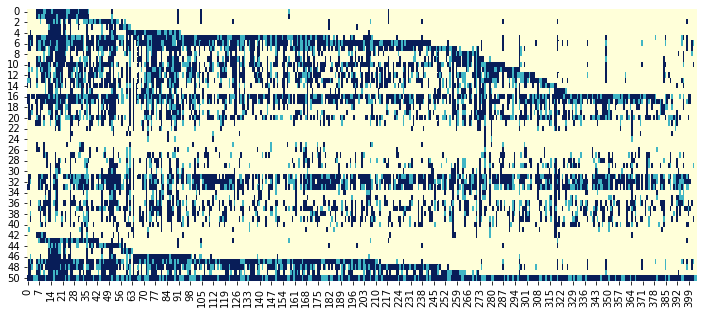

In [31]:
plt.figure(figsize=(12,5))
seaborn.heatmap(rl,cmap = 'YlGnBu',cbar = False)